In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "data/FAOSTAT_data_en_6-16-2023.csv"
csv = pd.read_csv(file)
df = pd.DataFrame(csv)

df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,0115,Barley,2015,2015,t,9198.09,T,Unofficial figure
1,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,0115,Barley,2016,2016,t,16385.39,T,Unofficial figure
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,0115,Barley,2017,2017,t,16383.10,A,Official figure
3,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,0115,Barley,2018,2018,t,18498.00,A,Official figure
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,0115,Barley,2019,2019,t,11927.00,A,Official figure


In [3]:
# Rename Features to remove white space
df = df.rename(columns={"Domain Code":"Domain_Code","Flag Description": "Flag_Description", "Area Code (M49)": "Area_Code_(M49)", "Element Code": "Element_Code", "Item Code (CPC)": "Item_code_(CPC)", "Year Code":"Year_Code"})

In [4]:
df.dtypes

Domain_Code          object
Domain               object
Area_Code_(M49)       int64
Area                 object
Element_Code          int64
Element              object
Item_code_(CPC)      object
Item                 object
Year_Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag_Description     object
dtype: object

In [5]:
df.isna().values.sum()

0

In [6]:
df['Flag_Description'].unique()

array(['Unofficial figure', 'Official figure',
       'Figure from international organizations', 'Imputed value',
       'Estimated value',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [7]:
# Remove all Missing values in feature Flag_Description

for row, col in df.iterrows():
    if col.Flag_Description == "Missing value (data cannot exist, not applicable)":
        df = df.drop(row)

df['Flag_Description'].unique()

array(['Unofficial figure', 'Official figure',
       'Figure from international organizations', 'Imputed value',
       'Estimated value'], dtype=object)

In [8]:
# Can I remove features?
# Domain_Code, Domain, Element_Code, Element, all yield the same value.
# Year_Code == Year
# Unit are all in tonnes 

df = df.drop(columns=["Domain_Code", "Domain", "Element_Code", "Year_Code", "Unit", "Element"])

In [9]:
# Analysis on North Korea

lst = []

for row, col in df.iterrows():
    if col.Area == "Democratic People's Republic of Korea":
        lst.append(col)

dprk = pd.DataFrame(lst)

In [10]:
dprk = dprk.drop(columns=["Area", "Area_Code_(M49)"])

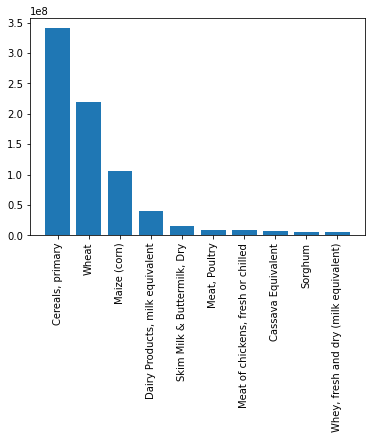

In [11]:
# Compare the Item and the Value (which is in tonnes)

item_value = df[['Item','Value']]
gb_item_value = item_value.groupby("Item").sum()
gb_item_value = gb_item_value.sort_values(by="Value", ascending=False)

# I want to make the gb_item_value index a column
gb_item_value['Item'] = gb_item_value.index

# Get only the top 10 imports

dprk_top_10 = gb_item_value.iloc[:10]

fig, ax = plt.subplots()
ax.bar(dprk_top_10['Item'], dprk_top_10["Value"])
plt.xticks(rotation=90)
plt.show()

In [19]:
# What was the rate of import for the feature 'Cereals, primary'?

lst = []
dprk_YIV = dprk[["Year","Item","Value"]]

for col, row in dprk_YIV.iterrows():
    if row.Item == "Cereals, primary":
        lst.append(row)

tmp_df = pd.DataFrame(lst)
lst = []

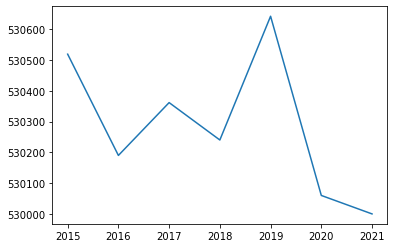

In [21]:
plt.plot(tmp_df['Year'], tmp_df['Value'])